# predicting brooklyn food price

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium==0.5.0
import folium # map rendering library

In [2]:
with open("nyu_2451_34572-geojson.json") as datafile:
  NYdata = json.load(datafile)

In [3]:
NYdata=NYdata['features']

In [4]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [5]:
for data in NYdata:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [6]:
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [7]:
def label_borough (row):
    if row['Borough'] == 'Bronx' :
      return 2
    if row['Borough'] == 'Manhattan' :
      return 1
    if row['Borough'] == 'Brooklyn' :
      return 3
    if row['Borough'] == 'Queens' :
      return 4
    if row['Borough'] == 'Staten Island' :
      return 5
    return 'Other'

In [8]:
neighborhoods['Borough ID']=neighborhoods.apply (lambda row: label_borough(row), axis=1)
neighborhoods

Borough               Neighborhood   Latitude  Longitude  \
0            Bronx                  Wakefield  40.894705 -73.847201   
1            Bronx                 Co-op City  40.874294 -73.829939   
2            Bronx                Eastchester  40.887556 -73.827806   
3            Bronx                  Fieldston  40.895437 -73.905643   
4            Bronx                  Riverdale  40.890834 -73.912585   
5            Bronx                Kingsbridge  40.881687 -73.902818   
6        Manhattan                Marble Hill  40.876551 -73.910660   
7            Bronx                   Woodlawn  40.898273 -73.867315   
8            Bronx                    Norwood  40.877224 -73.879391   
9            Bronx             Williamsbridge  40.881039 -73.857446   
10           Bronx                 Baychester  40.866858 -73.835798   
11           Bronx             Pelham Parkway  40.857413 -73.854756   
12           Bronx                City Island  40.847247 -73.786488   
13           Bronx               Bedford Park  40.870185 -73.885512   
14           Bronx         University Heights  40.855727 -73.910416   
15           Bronx             Morris Heights  40.847898 -73.919672   
16           Bronx                    Fordham  40.860997 -73.896427   
17           Bronx               East Tremont  40.842696 -73.887356   
18           Bronx                 West Farms  40.839475 -73.877745   
19           Bronx               High  Bridge  40.836623 -73.926102   
20           Bronx                    Melrose  40.819754 -73.909422   
21           Bronx                 Mott Haven  40.806239 -73.916100   
22           Bronx                Port Morris  40.801664 -73.913221   
23           Bronx                   Longwood  40.815099 -73.895788   
24           Bronx                Hunts Point  40.809730 -73.883315   
25           Bronx                 Morrisania  40.823592 -73.901506   
26           Bronx                  Soundview  40.821012 -73.865746   
27           Bronx               Clason Point  40.806551 -73.854144   
28           Bronx                Throgs Neck  40.815109 -73.816350   
29           Bronx               Country Club  40.844246 -73.824099   
30           Bronx                Parkchester  40.837938 -73.856003   
31           Bronx         Westchester Square  40.840619 -73.842194   
32           Bronx                   Van Nest  40.843608 -73.866299   
33           Bronx                Morris Park  40.847549 -73.850402   
34           Bronx                    Belmont  40.857277 -73.888452   
35           Bronx             Spuyten Duyvil  40.881395 -73.917190   
36           Bronx            North Riverdale  40.908543 -73.904531   
37           Bronx                 Pelham Bay  40.850641 -73.832074   
38           Bronx              Schuylerville  40.826580 -73.826203   
39           Bronx             Edgewater Park  40.821986 -73.813885   
40           Bronx                Castle Hill  40.819014 -73.848027   
41           Bronx                  Olinville  40.871371 -73.863324   
42           Bronx             Pelham Gardens  40.862966 -73.841612   
43           Bronx                  Concourse  40.834284 -73.915589   
44           Bronx                  Unionport  40.829774 -73.850535   
45           Bronx                   Edenwald  40.884561 -73.848083   
46        Brooklyn                  Bay Ridge  40.625801 -74.030621   
47        Brooklyn                Bensonhurst  40.611009 -73.995180   
48        Brooklyn                Sunset Park  40.645103 -74.010316   
49        Brooklyn                 Greenpoint  40.730201 -73.954241   
50        Brooklyn                  Gravesend  40.595260 -73.973471   
51        Brooklyn             Brighton Beach  40.576825 -73.965094   
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186   
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438   
54        Brooklyn                   Flatbush  40.636326 -73.958401   
55        Brooklyn              Cro

In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [10]:
colors_array = cm.rainbow(np.linspace(0, 1, 6))
rainbow = [colors.rgb2hex(i) for i in colors_array]

### different colors represent different boroughs

In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, ID in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood'], neighborhoods['Borough ID']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[ID],
        fill=True,
        fill_color=rainbow[ID],
        fill_opacity=0.4,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [12]:
CLIENT_ID = 'JLOLYTL3R3JH1JD3ODLANEZCG53BGLPV4ISOWFQ54XLTVQTD' # your Foursquare ID
CLIENT_SECRET = 'LSKYXTJROVH3QIOAPPRSYKZIVFVP4YGIVNVYPGVTMYY5WQVY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### define a function that gets venue details depending on different price ranges

In [13]:
def getNearbyVenues(names, latitudes, longitudes, price_range, radius=500,LIMIT=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}&price={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            'food',
            price_range)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Brooklyn neighbourhood food venues data

In [14]:
Brooklyn=neighborhoods[neighborhoods['Borough']== 'Brooklyn'].reset_index(drop=True)

In [15]:
Brooklyn.shape

(70, 5)

### first, find venues in the cheapest price range

In [16]:
venues = getNearbyVenues(names=Brooklyn['Neighborhood'],
                                   latitudes=Brooklyn['Latitude'],
                                   longitudes=Brooklyn['Longitude'],
                                   price_range=1
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [17]:
venues.drop_duplicates(inplace=True)

In [18]:
venues['Venue Category'].unique()

array(['Bagel Shop', 'Sandwich Place', 'Thai Restaurant',
       'Chinese Restaurant', 'Fast Food Restaurant', 'Donut Shop',
       'Mexican Restaurant', 'Bakery', 'Deli / Bodega', 'Gastropub',
       'Pizza Place', 'Breakfast Spot', 'Caribbean Restaurant', 'Diner',
       'Indian Restaurant', 'Restaurant', 'Taco Place', 'Café',
       'Korean Restaurant', 'Falafel Restaurant', 'Fried Chicken Joint',
       'Middle Eastern Restaurant', 'Burger Joint',
       'Latin American Restaurant', 'Hot Dog Joint', 'Food Truck',
       'Seafood Restaurant', 'Vietnamese Restaurant',
       'Italian Restaurant', 'Asian Restaurant',
       'Southern / Soul Food Restaurant', 'Burrito Place',
       'Cuban Restaurant', 'Dumpling Restaurant', 'Food',
       'American Restaurant', 'Tibetan Restaurant'], dtype=object)

In [19]:
# display the venues on a map
# create map of New York using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, name in zip(venues['Venue Latitude'], venues['Venue Longitude'], venues['Neighborhood'], venues['Venue']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        parse_html=False).add_to(map_venues)  
    
map_venues

In [20]:
venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bay Ridge              40.625801              -74.030621   
1    Bay Ridge              40.625801              -74.030621   
2    Bay Ridge              40.625801              -74.030621   
3    Bay Ridge              40.625801              -74.030621   
4    Bay Ridge              40.625801              -74.030621   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0           Bagel Boy       40.627896       -74.029335            Bagel Shop  
1            Cinnabon       40.623156       -74.031459        Sandwich Place  
2  My Thai Restaurant       40.629160       -74.028689       Thai Restaurant  
3      Pearl of China       40.624631       -74.030301    Chinese Restaurant  
4          McDonald's       40.622159       -74.027731  Fast Food Restaurant

### add a price range column to this dataframe

In [21]:
venues['Price Range']=1

In [22]:
venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bay Ridge              40.625801              -74.030621   
1    Bay Ridge              40.625801              -74.030621   
2    Bay Ridge              40.625801              -74.030621   
3    Bay Ridge              40.625801              -74.030621   
4    Bay Ridge              40.625801              -74.030621   

                Venue  Venue Latitude  Venue Longitude        Venue Category  \
0           Bagel Boy       40.627896       -74.029335            Bagel Shop   
1            Cinnabon       40.623156       -74.031459        Sandwich Place   
2  My Thai Restaurant       40.629160       -74.028689       Thai Restaurant   
3      Pearl of China       40.624631       -74.030301    Chinese Restaurant   
4          McDonald's       40.622159       -74.027731  Fast Food Restaurant   

   Price Range  
0            1  
1            1  
2            1  
3            1  
4            1

### now write a loop to get the other price ranges, and combine the dataframes into one

In [23]:
venues_priced=pd.DataFrame()

for i in range (4):
    venues = getNearbyVenues(names=Brooklyn['Neighborhood'],
                                   latitudes=Brooklyn['Latitude'],
                                   longitudes=Brooklyn['Longitude'],
                                   price_range=i+1
                                  )
    venues.drop_duplicates(inplace=True)
    venues['Price Range']=i+1
    venues_priced=venues_priced.append(venues,ignore_index=True)

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heig

In [24]:
venues_priced.tail()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
747     South Side              40.710861              -73.958001   
748     South Side              40.710861              -73.958001   
749  Fort Hamilton              40.614768              -74.031979   
750       New Lots              40.662744              -73.885118   
751   Fulton Ferry              40.703281              -73.995508   

                       Venue  Venue Latitude  Venue Longitude  \
747  Peter Luger Steak House       40.709958       -73.962291   
748          Maison Premiere       40.714239       -73.961512   
749        Embers Steakhouse       40.616648       -74.033815   
750        Piggys Restaurant       40.666164       -73.882599   
751           The River Café       40.703754       -73.994834   

          Venue Category  Price Range  
747           Steakhouse            4  
748   Seafood Restaurant            4  
749           Steakhouse            4  
750   Spanish Restaurant            4  
751  American Restaurant            4

In [25]:
colors_array2 = cm.rainbow(np.linspace(0, 1, 4))
rainbow2 = [colors.rgb2hex(i) for i in colors_array2]

In [26]:
# plot the different price range on a map

map_venues_priced = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, name, price in zip(venues_priced['Venue Latitude'], venues_priced['Venue Longitude'], venues_priced['Neighborhood'], venues_priced['Venue'], venues_priced['Price Range']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow2[price-1],
        fill=True,
        fill_color=rainbow2[price-1],
        fill_opacity=0.4,
        parse_html=False).add_to(map_venues_priced)  
    
map_venues_priced

## as initial examination, use k means to cluster the restaurants into 4 groups, based on the neighbourhood, category and price range

In [27]:
venues_onehot=pd.get_dummies(venues_priced[['Venue Category','Neighborhood']],prefix="", prefix_sep="")
venues_onehot['Price Range']=venues_priced['Price Range']
venues_onehot['Venue']=venues_priced['Venue']
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

Venue  African Restaurant  American Restaurant  \
0           Bagel Boy                   0                    0   
1            Cinnabon                   0                    0   
2  My Thai Restaurant                   0                    0   
3      Pearl of China                   0                    0   
4          McDonald's                   0                    0   

   Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  BBQ Joint  \
0                 0                       0                 0          0   
1                 0                       0                 0          0   
2                 0                       0                 0          0   
3                 0                       0                 0          0   
4                 0                       0                 0          0   

   Bagel Shop  Bakery  Breakfast Spot  Burger Joint  Burrito Place  Café  \
0           1       0               0             0              0     0   
1           0       0               0             0              0     0   
2           0       0               0             0              0     0   
3           0       0               0             0              0     0   
4           0       0               0             0              0     0   

   Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                          0                     0                   0   
1                          0                     0                   0   
2                          0                     0                   0   
3                          0                     0                   1   
4                          0                     0                   0   

   Creperie  Cuban Restaurant  Deli / Bodega  Dim Sum Restaurant  Diner  \
0         0                 0              0                   0      0   
1         0                 0              0                   0      0   
2         0                 0              0                   0      0   
3         0                 0              0                   0      0   
4         0                 0              0                   0      0   

   Donut Shop  Dumpling Restaurant  Eastern European Restaurant  \
0           0                    0                            0   
1           0                    0                            0   
2           0                    0                            0   
3           0                    0                            0   
4           0                    0                            0   

   Ethiopian Restaurant  Falafel Restaurant  Fast Food Restaurant  Food  \
0                     0                   0                     0     0   
1                     0                   0                     0     0   
2                     0                   0                     0     0   
3                     0                   0                     0     0   
4                     0                   0                     1     0   

   Food Court  Food Truck  French Restaurant  Fried Chicken Joint  Gastropub  \
0           0           0                  0                    0          0   
1           0           0                  0                    0          0   
2           0           0                  0                    0          0   
3           0           0                  0                    0          0   
4           0           0                  0                    0          0   

   German Restaurant  Greek Restaurant  Hot Dog Joint  Indian Restaurant  \
0                  0                 0              0                  0   
1                  0                 0              0                  0   
2                  0                 0              0                  0   
3                  0                 0              0                  0   
4                  0                 0              0                  0   

   Israeli Restau

In [28]:
kclusters = 4

venues_clustering = venues_onehot.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 1, 2, 2, 2, 1, 1], dtype=int32)

In [29]:
venues_priced.insert(0, 'Cluster Labels', kmeans.labels_)
venues_merged=venues_priced.merge(venues_onehot,how='outer')
venues_merged.drop(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue Category'],1,inplace=True)
venues_merged.head(10)

Cluster Labels                     Venue  Venue Latitude  Venue Longitude  \
0               1                 Bagel Boy       40.627896       -74.029335   
1               1                  Cinnabon       40.623156       -74.031459   
2               1        My Thai Restaurant       40.629160       -74.028689   
3               2            Pearl of China       40.624631       -74.030301   
4               1                McDonald's       40.622159       -74.027731   
5               1                McDonald's       40.622159       -74.027731   
6               1                McDonald's       40.598078       -73.961428   
7               1                McDonald's       40.598078       -73.961428   
8               2            Taste Of China       40.608834       -73.994117   
9               2  Panda Chinese Restaurant       40.611388       -73.990784   

   Price Range  African Restaurant  American Restaurant  Arepa Restaurant  \
0            1                   0                    0                 0   
1            1                   0                    0                 0   
2            1                   0                    0                 0   
3            1                   0                    0                 0   
4            1                   0                    0                 0   
5            1                   0                    0                 0   
6            1                   0                    0                 0   
7            1                   0                    0                 0   
8            1                   0                    0                 0   
9            1                   0                    0                 0   

   Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  \
0                       0                 0          0           1       0   
1                       0                 0          0           0       0   
2                       0                 0          0           0       0   
3                       0                 0          0           0       0   
4                       0                 0          0           0       0   
5                       0                 0          0           0       0   
6                       0                 0          0           0       0   
7                       0                 0          0           0       0   
8                       0                 0          0           0       0   
9                       0                 0          0           0       0   

   Breakfast Spot  Burger Joint  Burrito Place  Café  \
0               0             0              0     0   
1               0             0              0     0   
2               0             0              0     0   
3               0             0              0     0   
4               0             0              0     0   
5               0             0              0     0   
6               0             0              0     0   
7               0             0              0     0   
8               0             0              0     0   
9               0             0              0     0   

   Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                          0                     0                   0   
1                          0                     0                   0   
2                          0                     0                   0   
3                          0                     0                   1   
4                          0                     0                   0   
5                          0                     0                   0   
6                          0                     0                   0   
7                          0                     0                   0   
8                          0                     0                   1   
9                          0                     0        

### visualise the resulting cluster

In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_priced['Venue Latitude'], venues_priced['Venue Longitude'], venues_priced['Neighborhood'], venues_priced['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow2[cluster],
        fill=True,
        fill_color=rainbow2[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### now examine each cluster, grouped by the price range(s) present in the cluster

In [31]:
for i in range(kclusters):
    venues_grouped=venues_merged[venues_merged['Cluster Labels']==i].drop('Venue',1).groupby('Price Range').mean().reset_index()
    display(venues_grouped.sort_values(by=0,axis=1,ascending=False))

Venue Latitude  Price Range  North Side  South Side  Italian Restaurant  \
0        40.68188            2    0.133489    0.114754            0.096019   

   American Restaurant  Mexican Restaurant  Pizza Place  Clinton Hill  \
0             0.093677            0.067916     0.065574      0.056206   

   Fort Greene  Cobble Hill  Brooklyn Heights  Thai Restaurant  \
0     0.053864     0.053864          0.053864         0.039813   

   Japanese Restaurant     Dumbo     Diner  Downtown  Prospect Heights  \
0             0.037471  0.035129  0.035129  0.035129          0.035129   

   Carroll Gardens  French Restaurant  Bay Ridge  Greenpoint  Park Slope  \
0         0.032787           0.032787   0.032787    0.030445    0.030445   

   Middle Eastern Restaurant  Boerum Hill  Seafood Restaurant  \
0                   0.025761     0.025761            0.023419   

   Sushi Restaurant  Caribbean Restaurant  Mill Basin  Indian Restaurant  \
0          0.023419              0.023419    0.023419           0.021077   

   Burger Joint  Korean Restaurant  Fulton Ferry  Restaurant  Sandwich Place  \
0      0.021077           0.021077      0.021077    0.021077        0.021077   

   Latin American Restaurant  BBQ Joint  Vegetarian / Vegan Restaurant  \
0                   0.018735   0.018735                       0.016393   

   Fried Chicken Joint  Fort Hamilton  Asian Restaurant  Georgetown  \
0             0.016393       0.016393          0.016393    0.016393   

   East Williamsburg  Breakfast Spot  Sheepshead Bay  Brighton Beach  \
0           0.014052        0.014052        0.014052        0.014052   

   New American Restaurant  Deli / Bodega  Ditmas Park  Vietnamese Restaurant  \
0                 0.014052        0.01171      0.01171                0.01171   

   Wings Joint  Fast Food Restaurant  Windsor Terrace  \
0      0.01171               0.01171          0.01171   

   South American Restaurant  Williamsburg  Creperie      Café  Homecrest  \
0                   0.009368      0.009368  0.009368  0.009368   0.009368   

     Bakery  Kensington  Dim Sum Restaurant  Food Truck  Red Hook   Gowanus  \
0  0.009368    0.009368            0.009368    0.009368  0.009368  0.009368   

   Arepa Restaurant  Mediterranean Restaurant  Turkish Restaurant  \
0          0.009368                  0.007026            0.007026   

   Ramen Restaurant  Taco Place  Vinegar Hill  Spanish Restaurant  \
0          0.007026    0.007026      0.007026            0.007026   

   Argentinian Restaurant  Remsen Village  Sunset Park  City Line  \
0                0.004684        0.004684     0.004684   0.004684   

   Prospect Park South  Bushwick  Gravesend  Flatbush  Bath Beach  \
0             0.004684  0.004684   0.004684  0.004684    0.004684   

   Cuban Restaurant  Ethiopian Restaurant  Bensonhurst  Polish Restaurant  \
0          0.004684              0.004684     0.004684           0.004684   

   Bagel Shop  Southern / Soul Food Restaurant  Borough Park  \
0    0.004684                         0.004684      0.004684   

   Russian Restaurant  Greek Restaurant  Highland Park  Gerritsen Beach  \
0            0.004684          0.004684       0.002342         0.002342   

   Israeli Restaurant   Wingate   Midwood  Gastropub     Rugby  \
0            0.002342  0.002342  0.002342   0.002342  0.002342   

   African Restaurant  Eastern European Restaurant  Food Court  \
0            0.002342                     0.002342    0.002342   

   German Restaurant  Salad Place  Falafel Restaurant  Cypress Hills  \
0           0.002342     0.002342            0.002342       0.002342   

   Brownsville  Bedford Stuyvesant  Burrito Place  Cajun / Creole Restaurant  \
0     0.002342            0.002342       0.002342                   0.002342   

   Coney Island  Crown Heights  Shanghai Restaurant  \
0      0.002342       0.002342             0.002342   

   Prospect Lefferts Gardens  Tapas Restaurant  Taiwanese Restaurant  \
0                   0.002342          0.0023

Venue Latitude  Price Range  Cluster Labels  Donut Shop  Fort Hamilton  \
0       40.656927            1               1    0.765052       0.053665   

   Boerum Hill  Prospect Park South  Cypress Hills  Ditmas Park  Georgetown  \
0     0.052356             0.051047       0.050393     0.049084    0.048429   

   Broadway Junction  City Line  Manhattan Terrace  Clinton Hill  Downtown  \
0           0.045157   0.045157           0.044503      0.034686  0.033377   

   Pizza Place  Brooklyn Heights  East Williamsburg  Bath Beach  \
0     0.032723          0.032723           0.030105     0.02945   

   Fast Food Restaurant  Carroll Gardens  Homecrest  Flatbush  Brighton Beach  \
0              0.026832         0.025524   0.025524  0.025524        0.024869   

   Windsor Terrace  Starrett City  Ocean Hill   Gowanus  Gravesend  \
0         0.024215        0.02356    0.022906  0.022906   0.022906   

   Weeksville  Mill Basin  Bagel Shop  Burger Joint  Fried Chicken Joint  \
0    0.022251    0.022251    0.021597      0.019634             0.018325   

   North Side    Bakery  Middle Eastern Restaurant     Dumbo  South Side  \
0    0.014398  0.012435                   0.012435  0.011126    0.010471   

   Mexican Restaurant  Caribbean Restaurant  Latin American Restaurant  \
0            0.009162              0.009162                   0.007853   

   Fulton Ferry  Fort Greene  Williamsburg  Deli / Bodega     Diner  \
0      0.007199     0.007199      0.006545       0.006545  0.006545   

   Park Slope  Flatlands  Food Truck  Erasmus  Prospect Heights  \
0     0.00589    0.00589     0.00589  0.00589          0.005236   

   Prospect Lefferts Gardens  Dumpling Restaurant  Greenpoint  \
0                   0.005236             0.005236    0.004581   

   Falafel Restaurant  New Lots  Sunset Park  Sandwich Place  Cobble Hill  \
0            0.004581  0.003927     0.003927        0.003927     0.003927   

       Café  American Restaurant  Bushwick  Vinegar Hill  East New York  \
0  0.003927             0.003927  0.003927      0.003927       0.003272   

   Brownsville     Rugby  Remsen Village  Bay Ridge   Wingate  Burrito Place  \
0     0.003272  0.003272        0.003272   0.003272  0.003272       0.003272   

   Taco Place  Thai Restaurant  Asian Restaurant  Bensonhurst  Red Hook  \
0    0.003272         0.002618          0.002618     0.001963  0.001963   

   Restaurant  Kensington  Indian Restaurant  Hot Dog Joint  \
0    0.001963    0.001963           0.001309       0.001309   

   Southern / Soul Food Restaurant  Breakfast Spot  Vietnamese Restaurant  \
0                         0.001309        0.001309               0.000654   

   Cuban Restaurant  Gerritsen Beach  Italian Restaurant   Madison  \
0          0.000654         0.000654            0.000654  0.000654   

   Korean Restaurant      Food  Gastropub  Coney Island  Seafood Restaurant  \
0           0.000654  0.000654   0.000654      0.000654            0.000654   

   Tibetan Restaurant  Sheepshead Bay  Highland Park  \
0            0.000654        0.000654            0.0   

   Cajun / Creole Restaurant  African Restaurant  Arepa Restaurant  \
0                        0.0                 0.0               0.0   

   Argentinian Restaurant  BBQ Joint  Chinese Restaurant  Dim Sum Restaurant  \
0                     0.0        0.0                 0.0                 0.0   

   French Restaurant  Midwood  Food Court  Ethiopian Restaurant  \
0                0.0      0.0         0.0                   0.0   

   Eastern European Restaurant  Creperie  Vegetarian / Vegan Restaurant  \
0                          0.0       0.0                            0.0   

   German Restaurant  Greek Restaurant  Wings Joint  Turkish Restaurant  \
0                0.0               0.0          0.0                 0.0   

   Bedford Stuyvesant  Tapas Restaurant  Borough Park  Taiwanese Restaurant  \
0                 0.0               0.0           0.0                   0.0   

   Sushi Restauran

Venue Latitude  Cluster Labels  Chinese Restaurant  Price Range  Gravesend  \
0       40.653191               2                 1.0            1   0.146341   
1       40.649802               2                 1.0            2   0.000000   

   Windsor Terrace  Bensonhurst  Clinton Hill  Greenpoint  City Line  \
0         0.073171     0.073171      0.073171     0.04878    0.04878   
1         0.000000     0.111111      0.000000     0.00000    0.00000   

   Mill Basin  Fort Hamilton  Brooklyn Heights  Bedford Stuyvesant  \
0    0.048780        0.04878           0.04878             0.02439   
1    0.111111        0.00000           0.00000             0.00000   

   Boerum Hill  East Williamsburg  Erasmus  Starrett City  Carroll Gardens  \
0      0.02439            0.02439  0.02439        0.02439          0.02439   
1      0.00000            0.00000  0.00000        0.00000          0.00000   

   Kensington  Bushwick  Crown Heights  East Flatbush  Bath Beach  Bay Ridge  \
0    0.024390  0.024390        0.02439        0.02439     0.02439   0.024390   
1    0.111111  0.111111        0.00000        0.00000     0.00000   0.111111   

   Ocean Hill  Park Slope  Prospect Lefferts Gardens  Cobble Hill  \
0     0.02439    0.024390                    0.02439      0.02439   
1     0.00000    0.111111                    0.00000      0.00000   

   Cypress Hills  Coney Island  Downtown  Ditmas Park  Williamsburg  \
0            0.0           0.0       0.0          0.0           0.0   
1            0.0           0.0       0.0          0.0           0.0   

   Brownsville  Broadway Junction  Brighton Beach  Borough Park  Wings Joint  \
0          0.0                0.0             0.0           0.0          0.0   
1          0.0                0.0             0.0           0.0          0.0   

   Vietnamese Restaurant  Vegetarian / Vegan Restaurant  Dumbo  Fort Greene  \
0                    0.0                            0.0    0.0          0.0   
1                    0.0                            0.0    0.0          0.0   

   East New York  New Lots  Vinegar Hill  Sunset Park  South Side  \
0            0.0       0.0           0.0          0.0    0.000000   
1            0.0       0.0           0.0          0.0    0.111111   

   Sheepshead Bay  Rugby  Remsen Village  Red Hook  Prospect Park South  \
0             0.0    0.0             0.0       0.0                  0.0   
1             0.0    0.0             0.0       0.0                  0.0   

   Prospect Heights  North Side  Midwood  Flatbush  Manhattan Terrace  \
0               0.0         0.0      0.0       0.0                0.0   
1               0.0         0.0      0.0       0.0                0.0   

   Madison  Homecrest  Highland Park   Gowanus  Gerritsen Beach  Georgetown  \
0      0.0   0.000000            0.0  0.000000              0.0         0.0   
1      0.0   0.111111            0.0  0.111111              0.0         0.0   

   Turkish Restaurant  Weeksville  Flatlands  Fulton Ferry  Thai Restaurant  \
0                 0.0         0.0        0.0           0.0              0.0   
1                 0.0         0.0        0.0           0.0              0.0   

   Tibetan Restaurant  Tapas Restaurant  French Restaurant  Food Truck  \
0                 0.0               0.0                0.0         0.0   
1                 0.0               0.0                0.0         0.0   

   Food Court  Food  Fast Food Restaurant  Falafel Restaurant  \
0         0.0   0.0                   0.0                 0.0   
1         0.0   0.0                   0.0                 0.0   

   Ethiopian Restaurant  Eastern European Restaurant  Dumpling Restaurant  \
0                   0.0                          0.0                  0.0   
1                   0.0                          0.0                  0.0   

   Donut Shop  Diner  Dim Sum Restaurant  Deli / Bodega  Cuban Restaurant  \
0         0.0    0.0                 0.0            0.0               0.0   
1         0.0    0.

Venue Latitude  Price Range  Cluster Labels  American Restaurant  \
0       40.679232            3               3             0.168067   
1       40.687775            4               3             0.058824   

   Italian Restaurant  South Side  North Side  Japanese Restaurant  Bay Ridge  \
0            0.159664    0.134454    0.109244             0.109244    0.07563   
1            0.058824    0.205882    0.176471             0.000000    0.00000   

   Tapas Restaurant  Williamsburg  Fulton Ferry  Fort Greene  \
0           0.07563      0.058824      0.058824     0.058824   
1           0.00000      0.147059      0.029412     0.000000   

   French Restaurant  Seafood Restaurant  New American Restaurant   Gowanus  \
0            0.05042            0.050420                 0.042017  0.042017   
1            0.00000            0.117647                 0.029412  0.000000   

   Mexican Restaurant  Mill Basin     Dumbo  Cobble Hill  Pizza Place  \
0            0.042017    0.042017  0.042017     0.042017     0.033613   
1            0.029412    0.000000  0.000000     0.000000     0.000000   

   Taco Place  Clinton Hill  Boerum Hill  South American Restaurant  \
0    0.033613      0.033613     0.033613                   0.033613   
1    0.000000      0.000000     0.000000                   0.000000   

   Carroll Gardens  Park Slope  Breakfast Spot  Russian Restaurant  \
0         0.033613    0.033613        0.033613             0.02521   
1         0.029412    0.029412        0.000000             0.00000   

   Brooklyn Heights  Fort Hamilton  Sheepshead Bay  Mediterranean Restaurant  \
0           0.02521       0.025210        0.025210                  0.016807   
1           0.00000       0.029412        0.029412                  0.000000   

   Deli / Bodega  Restaurant  Georgetown   Madison  Chinese Restaurant  \
0       0.016807    0.016807    0.016807  0.016807            0.016807   
1       0.000000    0.000000    0.000000  0.000000            0.029412   

   Turkish Restaurant  Downtown   Erasmus  East Williamsburg  Red Hook  \
0            0.016807  0.016807  0.008403           0.008403  0.008403   
1            0.000000  0.000000  0.000000           0.000000  0.000000   

   Spanish Restaurant  Polish Restaurant  Steakhouse  Peruvian Restaurant  \
0            0.008403           0.008403    0.008403             0.008403   
1            0.117647           0.000000    0.147059             0.000000   

   Latin American Restaurant  Prospect Heights  Vinegar Hill  \
0                   0.008403          0.008403      0.008403   
1                   0.294118          0.029412      0.000000   

   German Restaurant  Gastropub  Borough Park  Brighton Beach  Greenpoint  \
0           0.008403   0.008403      0.008403        0.008403    0.008403   
1           0.000000   0.000000      0.029412        0.000000    0.000000   

   Homecrest  Crown Heights  Coney Island  Cypress Hills  Starrett City  \
0   0.008403       0.000000           0.0       0.000000       0.000000   
1   0.000000       0.029412           0.0       0.029412       0.029412   

   Sunset Park  Ditmas Park  City Line  Windsor Terrace  Manhattan Terrace  \
0          0.0          0.0        0.0              0.0                0.0   
1          0.0          0.0        0.0              0.0                0.0   

   Rugby  Ocean Hill  Kensington  Highland Park  Midwood  Gravesend  New Lots  \
0    0.0         0.0         0.0            0.0      0.0        0.0  0.000000   
1    0.0         0.0         0.0            0.0      0.0        0.0  0.058824   

   Gerritsen Beach  Bushwick  Remsen Village  Weeksville  \
0              0.0  0.000000             0.0         0.0   
1              0.0  0.029412             0.0         0.0   

   Prospect Lefferts Gardens  Flatlands  Prospect Park South  East New York  \
0                        0.0        0.0                  0.0       0.000000   
1                        0.0        0.0                  0.0       0.058824   

 

### some interesting observations can be made:
clusters are related to price ranges: cluster 0 is lower mid range, cluster 1 is mid range, cluster 2 is low range and cluster 3 is high.

cluster 1 contains only italian resturants.

cluster 2 has many donut shops.

### try a different clustering algorithm

In [32]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

#sc = (n_clusters=kclusters, assign_labels="discretize",random_state=0).fit(venues_clustering)
ac=AgglomerativeClustering(n_clusters=kclusters).fit(venues_clustering)
#sc.labels_[0:10]
ac.labels_[0:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [33]:
venues_priced['Cluster Labels']=ac.labels_

In [34]:
venues_priced.head()

Cluster Labels Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0               0    Bay Ridge              40.625801              -74.030621   
1               0    Bay Ridge              40.625801              -74.030621   
2               0    Bay Ridge              40.625801              -74.030621   
3               0    Bay Ridge              40.625801              -74.030621   
4               1    Bay Ridge              40.625801              -74.030621   

                Venue  Venue Latitude  Venue Longitude        Venue Category  \
0           Bagel Boy       40.627896       -74.029335            Bagel Shop   
1            Cinnabon       40.623156       -74.031459        Sandwich Place   
2  My Thai Restaurant       40.629160       -74.028689       Thai Restaurant   
3      Pearl of China       40.624631       -74.030301    Chinese Restaurant   
4          McDonald's       40.622159       -74.027731  Fast Food Restaurant   

   Price Range  
0            1  
1            1  
2            1  
3            1  
4            1

In [35]:
venues_merged=venues_priced.merge(venues_onehot,how='outer')
venues_merged.drop(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue Category'],1,inplace=True)
venues_merged.head(10)

Cluster Labels                     Venue  Venue Latitude  Venue Longitude  \
0               0                 Bagel Boy       40.627896       -74.029335   
1               0                  Cinnabon       40.623156       -74.031459   
2               0        My Thai Restaurant       40.629160       -74.028689   
3               0            Pearl of China       40.624631       -74.030301   
4               1                McDonald's       40.622159       -74.027731   
5               1                McDonald's       40.622159       -74.027731   
6               1                McDonald's       40.598078       -73.961428   
7               1                McDonald's       40.598078       -73.961428   
8               1            Taste Of China       40.608834       -73.994117   
9               1  Panda Chinese Restaurant       40.611388       -73.990784   

   Price Range  African Restaurant  American Restaurant  Arepa Restaurant  \
0            1                   0                    0                 0   
1            1                   0                    0                 0   
2            1                   0                    0                 0   
3            1                   0                    0                 0   
4            1                   0                    0                 0   
5            1                   0                    0                 0   
6            1                   0                    0                 0   
7            1                   0                    0                 0   
8            1                   0                    0                 0   
9            1                   0                    0                 0   

   Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  \
0                       0                 0          0           1       0   
1                       0                 0          0           0       0   
2                       0                 0          0           0       0   
3                       0                 0          0           0       0   
4                       0                 0          0           0       0   
5                       0                 0          0           0       0   
6                       0                 0          0           0       0   
7                       0                 0          0           0       0   
8                       0                 0          0           0       0   
9                       0                 0          0           0       0   

   Breakfast Spot  Burger Joint  Burrito Place  Café  \
0               0             0              0     0   
1               0             0              0     0   
2               0             0              0     0   
3               0             0              0     0   
4               0             0              0     0   
5               0             0              0     0   
6               0             0              0     0   
7               0             0              0     0   
8               0             0              0     0   
9               0             0              0     0   

   Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                          0                     0                   0   
1                          0                     0                   0   
2                          0                     0                   0   
3                          0                     0                   1   
4                          0                     0                   0   
5                          0                     0                   0   
6                          0                     0                   0   
7                          0                     0                   0   
8                          0                     0                   1   
9                          0                     0        

In [36]:
for i in range(kclusters):
    venues_grouped=venues_merged[venues_merged['Cluster Labels']==i].drop('Venue',1).groupby('Price Range').mean().reset_index()
    display(venues_grouped.sort_values(by=0,axis=1,ascending=False))

Venue Latitude  Price Range  Brooklyn Heights  Clinton Hill  Pizza Place  \
0       40.689998            1          0.155844      0.155844     0.129870   
1       40.684255            2          0.070946      0.077703     0.081081   
2       40.689621            3          0.028986      0.057971     0.057971   

   South Side  North Side  Bagel Shop  Mexican Restaurant  Chinese Restaurant  \
0    0.103896    0.103896    0.090909            0.090909            0.090909   
1    0.152027    0.179054    0.003378            0.081081            0.020270   
2    0.217391    0.159420    0.000000            0.014493            0.014493   

   Burger Joint  Park Slope  Middle Eastern Restaurant     Diner  Fort Greene  \
0      0.090909    0.090909                   0.064935  0.064935     0.051948   
1      0.023649    0.047297                   0.020270  0.040541     0.070946   
2      0.000000    0.014493                   0.000000  0.000000     0.101449   

   Bay Ridge  American Restaurant  Deli / Bodega  Restaurant  Williamsburg  \
0   0.051948             0.051948       0.051948    0.038961      0.038961   
1   0.033784             0.087838       0.016892    0.030405      0.013514   
2   0.000000             0.086957       0.028986    0.028986      0.101449   

   Fast Food Restaurant  Cobble Hill  Falafel Restaurant  Kensington  \
0              0.038961     0.025974            0.025974    0.025974   
1              0.000000     0.067568            0.003378    0.013514   
2              0.000000     0.057971            0.000000    0.000000   

   Latin American Restaurant  Fried Chicken Joint  Thai Restaurant  \
0                   0.025974             0.025974         0.025974   
1                   0.027027             0.000000         0.057432   
2                   0.000000             0.000000         0.000000   

   Dumpling Restaurant  Broadway Junction  East New York  Gerritsen Beach  \
0             0.025974           0.012987       0.012987         0.012987   
1             0.000000           0.000000       0.003378         0.003378   
2             0.000000           0.000000       0.000000         0.000000   

   Southern / Soul Food Restaurant  Georgetown  Fulton Ferry  Fort Hamilton  \
0                         0.012987    0.012987      0.012987       0.012987   
1                         0.003378    0.010135      0.016892       0.010135   
2                         0.000000    0.014493      0.014493       0.000000   

    Erasmus  Vietnamese Restaurant  New Lots     Dumbo  Bath Beach  Downtown  \
0  0.012987               0.012987  0.012987  0.012987    0.012987  0.012987   
1  0.000000               0.016892  0.000000  0.023649    0.000000  0.010135   
2  0.014493               0.000000  0.000000  0.000000    0.000000  0.028986   

   Cypress Hills    Bakery  Sandwich Place  Greenpoint  Brownsville     Rugby  \
0       0.012987  0.012987        0.012987    0.012987     0.012987  0.012987   
1       0.000000  0.010135        0.000000    0.016892     0.003378  0.003378   
2       0.000000  0.000000        0.000000    0.000000     0.000000  0.000000   

   Hot Dog Joint  Breakfast Spot  Windsor Terrace  Coney Island  \
0       0.012987        0.000000              0.0           0.0   
1       0.000000        0.010135              0.0           0.0   
2       0.000000        0.028986              0.0           0.0   

   Crown Heights  Weeksville  Ditmas Park  Flatlands  Sunset Park  \
0       0.000000         0.0          0.0        0.0     0.000000   
1       0.003378         0.0          0.0        0.0     0.003378   
2       0.000000         0.0          0.0        0.0     0.000000   

   Starrett City  African Restaurant  East Flatbush  Sheepshead Bay  \
0            0.0            0.000000            0.0        0.000000   
1            0.0            0.003378            0.0        0.016892   
2            0.0            0.000000            0.0        0.014493   

   East Williamsburg  City Line  Flatbush  Vinegar

Venue Latitude  Price Range  Cluster Labels  Donut Shop  Fort Hamilton  \
0       40.655118            1               1    0.783512       0.055630   
1       40.677134            2               1    0.000000       0.017094   
2       40.619572            3               1    0.000000       0.000000   

   Boerum Hill  Prospect Park South  Cypress Hills  Ditmas Park  Georgetown  \
0      0.05429             0.052279       0.050938     0.050268    0.048928   
1      0.08547             0.017094       0.008547     0.042735    0.034188   
2      0.00000             0.000000       0.000000     0.000000    0.500000   

   City Line  Manhattan Terrace  Broadway Junction  Downtown  \
0   0.047587           0.045576           0.045576  0.033512   
1   0.000000           0.000000           0.000000  0.102564   
2   0.000000           0.000000           0.000000  0.000000   

   East Williamsburg  Bath Beach  Clinton Hill  Gravesend  Carroll Gardens  \
0           0.031501    0.030161      0.029491    0.02748         0.026810   
1           0.051282    0.017094      0.008547    0.00000         0.059829   
2           0.000000    0.000000      0.000000    0.00000         0.000000   

   Brooklyn Heights  Pizza Place  Windsor Terrace  Flatbush  Homecrest  \
0          0.026810     0.026810         0.026810  0.026139   0.026139   
1          0.008547     0.034188         0.042735  0.000000   0.000000   
2          0.000000     0.000000         0.000000  0.000000   0.000000   

   Brighton Beach  Fast Food Restaurant  Starrett City  Mill Basin  \
0        0.025469              0.025469       0.024799    0.024129   
1        0.008547              0.042735       0.000000    0.025641   
2        0.000000              0.000000       0.000000    0.500000   

   Ocean Hill   Gowanus  Weeksville  Chinese Restaurant  Bagel Shop  \
0    0.024129  0.023458    0.022788            0.022788    0.017426   
1    0.000000  0.000000    0.000000            0.025641    0.008547   
2    0.000000  0.000000    0.000000            0.000000    0.000000   

   Fried Chicken Joint  Burger Joint    Bakery     Dumbo  \
0             0.017426      0.015416  0.012064  0.010724   
1             0.059829      0.017094  0.008547  0.051282   
2             0.000000      0.000000  0.000000  0.000000   

   Middle Eastern Restaurant  North Side  Caribbean Restaurant  \
0                   0.009383    0.009383              0.009383   
1                   0.042735    0.025641              0.085470   
2                   0.000000    0.000000              0.000000   

   Latin American Restaurant  Fulton Ferry  Food Truck  \
0                   0.006702      0.006702    0.006032   
1                   0.000000      0.034188    0.034188   
2                   0.000000      0.000000    0.000000   

   Prospect Lefferts Gardens  Flatlands   Erasmus  South Side  \
0                   0.006032   0.006032  0.006032    0.005362   
1                   0.008547   0.000000  0.008547    0.034188   
2                   0.000000   0.000000  0.000000    0.000000   

   Prospect Heights  Greenpoint  Williamsburg  Fort Greene  \
0          0.005362    0.005362      0.004692     0.004692   
1          0.085470    0.068376      0.000000     0.017094   
2          0.000000    0.000000      0.000000     0.000000   

   Mexican Restaurant  Bushwick  Vinegar Hill      Café  Deli / Bodega  \
0            0.004692  0.004692      0.004021  0.004021       0.004021   
1            0.042735  0.017094      0.017094  0.017094       0.000000   
2            0.000000  0.000000      0.000000  0.000000       0.000000   

   Bensonhurst  Sunset Park  Dumpling Restaurant  New Lots  Taco Place  \
0     0.004021     0.004021             0.004021  0.003351    0.003351   
1     0.008547     0.000000             0.000000  0.000000    0.008547   
2     0.000000     0.000000             0.000000  0.000000    0.000000   

   Remsen Village  Cobble Hill   Wingate  Sandwich Place  Burrito Place  \
0        0.003351     0.00

Venue Latitude  Price Range  Cluster Labels  American Restaurant  \
0       40.653557            2               2             1.000000   
1       40.676678            3               2             0.451613   
2       40.687941            4               2             0.060606   

   Bay Ridge     Dumbo  Windsor Terrace  Downtown  Cobble Hill  Coney Island  \
0   0.666667  0.333333              0.0       0.0     0.000000           0.0   
1   0.064516  0.161290              0.0       0.0     0.032258           0.0   
2   0.000000  0.000000              0.0       0.0     0.000000           0.0   

   Crown Heights  Cypress Hills  Ditmas Park  East Flatbush  City Line  \
0       0.000000       0.000000          0.0            0.0        0.0   
1       0.000000       0.000000          0.0            0.0        0.0   
2       0.030303       0.030303          0.0            0.0        0.0   

   East New York  East Williamsburg  Erasmus  Flatbush  Clinton Hill  \
0       0.000000           0.000000      0.0  0.000000           0.0   
1       0.000000           0.032258      0.0  0.000000           0.0   
2       0.060606           0.000000      0.0  0.030303           0.0   

   Bushwick  Carroll Gardens  Fort Greene  Brownsville  Brooklyn Heights  \
0  0.000000              0.0          0.0          0.0          0.000000   
1  0.000000              0.0          0.0          0.0          0.032258   
2  0.030303              0.0          0.0          0.0          0.000000   

   Broadway Junction  Brighton Beach  Borough Park  Boerum Hill  Bensonhurst  \
0                0.0             0.0      0.000000          0.0          0.0   
1                0.0             0.0      0.032258          0.0          0.0   
2                0.0             0.0      0.030303          0.0          0.0   

   Bedford Stuyvesant  Bath Beach  Wings Joint  Vietnamese Restaurant  \
0                 0.0         0.0          0.0                    0.0   
1                 0.0         0.0          0.0                    0.0   
2                 0.0         0.0          0.0                    0.0   

   Vegetarian / Vegan Restaurant  Flatlands  Fort Hamilton  Williamsburg  \
0                            0.0        0.0       0.000000      0.000000   
1                            0.0        0.0       0.096774      0.000000   
2                            0.0        0.0       0.030303      0.151515   

   Ocean Hill  Weeksville  Vinegar Hill  Sunset Park  Starrett City  \
0         0.0         0.0      0.000000          0.0       0.000000   
1         0.0         0.0      0.032258          0.0       0.000000   
2         0.0         0.0      0.000000          0.0       0.030303   

   South Side  Sheepshead Bay  Rugby  Remsen Village  Red Hook  \
0    0.000000        0.000000    0.0             0.0       0.0   
1    0.032258        0.032258    0.0             0.0       0.0   
2    0.212121        0.030303    0.0             0.0       0.0   

   Prospect Park South  Prospect Lefferts Gardens  Prospect Heights  \
0                  0.0                        0.0          0.000000   
1                  0.0                        0.0          0.032258   
2                  0.0                        0.0          0.030303   

   Park Slope  North Side  Turkish Restaurant  New Lots  Mill Basin  Midwood  \
0    0.000000    0.000000                 0.0  0.000000         0.0      0.0   
1    0.096774    0.032258                 0.0  0.000000         0.0      0.0   
2    0.030303    0.181818                 0.0  0.060606         0.0      0.0   

   Manhattan Terrace  Madison  Kensington  Homecrest  Highland Park  \
0                0.0      0.0         0.0   0.000000            0.0   
1                0.0      0.0         0.0   0.032258            0.0   
2                0.0      0.0         0.0   0.000000            0.0   

   Greenpoint  Gravesend   Gowanus  Gerritsen Beach  Georgetown  Fulton Ferry  \
0    0.000000        0.0  0.000000              0.0         0.0  

Venue Latitude  Cluster Labels  Price Range  Italian Restaurant  \
0       40.664312               3            2            1.000000   
1       40.648736               3            3            0.823529   
2       40.682311               3            4            1.000000   

   Carroll Gardens  Fort Hamilton  Gravesend  Cobble Hill  South Side  Dumbo  \
0         0.300000            0.1        0.1          0.1        0.05   0.05   
1         0.176471            0.0        0.0          0.0        0.00   0.00   
2         1.000000            0.0        0.0          0.0        0.00   0.00   

   Bay Ridge   Gowanus  Sunset Park  Brooklyn Heights  North Side  \
0   0.050000  0.050000         0.05              0.05    0.050000   
1   0.411765  0.176471         0.00              0.00    0.058824   
2   0.000000  0.000000         0.00              0.00    0.000000   

   Bensonhurst  East Flatbush  Downtown  Clinton Hill  Ditmas Park  \
0         0.05            0.0       0.0           0.0          0.0   
1         0.00            0.0       0.0           0.0          0.0   
2         0.00            0.0       0.0           0.0          0.0   

   Cypress Hills  Crown Heights  Coney Island  East New York  Brownsville  \
0            0.0            0.0           0.0            0.0          0.0   
1            0.0            0.0           0.0            0.0          0.0   
2            0.0            0.0           0.0            0.0          0.0   

   City Line  Bushwick  Erasmus  Broadway Junction  Brighton Beach  \
0        0.0       0.0      0.0                0.0             0.0   
1        0.0       0.0      0.0                0.0             0.0   
2        0.0       0.0      0.0                0.0             0.0   

   Borough Park  Boerum Hill  Bedford Stuyvesant  Bath Beach  Wings Joint  \
0           0.0     0.000000                 0.0         0.0          0.0   
1           0.0     0.058824                 0.0         0.0          0.0   
2           0.0     0.000000                 0.0         0.0          0.0   

   Vietnamese Restaurant  Vegetarian / Vegan Restaurant  East Williamsburg  \
0                    0.0                            0.0                0.0   
1                    0.0                            0.0                0.0   
2                    0.0                            0.0                0.0   

   Windsor Terrace  Flatbush  New Lots  Weeksville  Vinegar Hill  \
0              0.0       0.0       0.0         0.0           0.0   
1              0.0       0.0       0.0         0.0           0.0   
2              0.0       0.0       0.0         0.0           0.0   

   Starrett City  Sheepshead Bay  Rugby  Remsen Village  Red Hook  \
0            0.0        0.000000    0.0             0.0       0.0   
1            0.0        0.058824    0.0             0.0       0.0   
2            0.0        0.000000    0.0             0.0       0.0   

   Prospect Park South  Prospect Lefferts Gardens  Prospect Heights  \
0                  0.0                        0.0               0.0   
1                  0.0                        0.0               0.0   
2                  0.0                        0.0               0.0   

   Park Slope  Ocean Hill  Mill Basin  Flatlands  Midwood  Manhattan Terrace  \
0         0.0         0.0         0.0        0.0      0.0                0.0   
1         0.0         0.0         0.0        0.0      0.0                0.0   
2         0.0         0.0         0.0        0.0      0.0                0.0   

    Madison  Kensington  Homecrest  Highland Park  Greenpoint  \
0  0.000000         0.0        0.0            0.0         0.0   
1  0.058824         0.0        0.0            0.0         0.0   
2  0.000000         0.0        0.0            0.0         0.0   

   Gerritsen Beach  Georgetown  Fulton Ferry  Turkish Restaurant  \
0              0.0         0.0           0.0                 0.0   
1              0.0         0.0           0.0                 0.0   
2         

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_priced['Venue Latitude'], venues_priced['Venue Longitude'], venues_priced['Neighborhood'], venues_priced['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow2[cluster],
        fill=True,
        fill_color=rainbow2[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

other clustering methods results in clusters that are less interpretable.

## Now try use different classification algorithms on the dataset to predict prices.

In [38]:
#first we need to prep the dataset into a training set and a test set.
from sklearn.model_selection import train_test_split
X=venues_merged.drop(['Cluster Labels','Venue'],1)
y=venues_merged['Price Range']
X=X.drop('Price Range',1)
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2,stratify=y)

In [39]:
train_x.head()

Venue Latitude  Venue Longitude  African Restaurant  \
451        40.598100       -73.997225                   0   
2053       40.675319       -74.016540                   0   
1995       40.702541       -73.987082                   0   
301        40.680480       -73.996586                   0   
344        40.679453       -73.880491                   0   

      American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
451                     0                 0                       0   
2053                    0                 0                       0   
1995                    0                 0                       0   
301                     0                 0                       0   
344                     0                 0                       0   

      Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  Breakfast Spot  \
451                  0          0           0       0               0   
2053                 0          0           0       0               0   
1995                 0          0           0       0               0   
301                  0          0           0       0               0   
344                  0          0           0       0               0   

      Burger Joint  Burrito Place  Café  Cajun / Creole Restaurant  \
451              0              0     0                          0   
2053             0              0     0                          0   
1995             0              0     0                          0   
301              0              0     0                          0   
344              0              0     0                          0   

      Caribbean Restaurant  Chinese Restaurant  Creperie  Cuban Restaurant  \
451                      0                   0         0                 0   
2053                     0                   0         0                 0   
1995                     0                   0         0                 0   
301                      0                   0         0                 0   
344                      0                   0         0                 0   

      Deli / Bodega  Dim Sum Restaurant  Diner  Donut Shop  \
451               0                   0      0           1   
2053              0                   0      0           0   
1995              0                   0      0           0   
301               0                   0      0           1   
344               0                   0      0           1   

      Dumpling Restaurant  Eastern European Restaurant  Ethiopian Restaurant  \
451                     0                            0                     0   
2053                    0                            0                     0   
1995                    0                            0                     0   
301                     0                            0                     0   
344                     0                            0                     0   

      Falafel Restaurant  Fast Food Restaurant  Food  Food Court  Food Truck  \
451                    0                     0     0           0           0   
2053                   0                     0     0           0           0   
1995                   0                     0     0           0           0   
301                    0                     0     0           0           0   
344                    0                     0     0           0           0   

      French Restaurant  Fried Chicken Joint  Gastropub  German Restaurant  \
451                   0                    0          0                  0   
2053                  0                    0          0                  0   
1995                  0                    0          0                  0   
301                   0                    0          0                  0   
344                   0                    0          0                  0   

      Greek Restaurant  Hot Dog Joint  Indian Restaurant  Israeli Restaurant  \

In [144]:
# the data is not normalized, especially the location data
from sklearn.preprocessing import StandardScaler
# use a pipeline 
from sklearn.pipeline import make_pipeline
# use a grid search also
from sklearn.model_selection import GridSearchCV
# import the potential classifiers 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

pipe=make_pipeline(StandardScaler(),SVC())

parameters=[{'svc__kernel': ['rbf'], 'svc__gamma': ['scale',1e-3, 1e-4],'svc__C': [1, 10, 100, 1000]}]

clf=GridSearchCV(pipe,parameters,cv=5).fit(train_x,train_y)


In [41]:
clf.best_params_

{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [42]:
clf.best_score_

0.8441584987852895

In [43]:
# now repeat the same for other classifiers
# decision tree
pipe=make_pipeline(StandardScaler(),DecisionTreeClassifier())

parameters=[{'decisiontreeclassifier__criterion': ['entropy','gini'], 'decisiontreeclassifier__max_depth': [6,8,10,12,14,None]}]

clf=GridSearchCV(pipe,parameters,cv=5).fit(train_x,train_y)

print('the best parameters are:', clf.best_params_)
print('the best score is:', clf.best_score_)

the best parameters are: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None}
the best score is: 0.8684929211694732


In [44]:
# now repeat the same for other classifiers
# k nearest neighbors
pipe=make_pipeline(StandardScaler(),KNeighborsClassifier())

parameters=[{'kneighborsclassifier__n_neighbors': [14,15,16], 'kneighborsclassifier__p': [1,2], 'kneighborsclassifier__weights':['uniform','distance']}]

clf=GridSearchCV(pipe,parameters,cv=5).fit(train_x,train_y)

print('the best parameters are:', clf.best_params_)
print('the best score is:', clf.best_score_)

the best parameters are: {'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
the best score is: 0.8534204574013572


In [45]:
# now repeat the same for other classifiers
# multi layer perceptron
pipe=make_pipeline(StandardScaler(),MLPClassifier())

parameters=[{'mlpclassifier__solver': ['adam'], 'mlpclassifier__alpha': [1e-3,1e-4,1e-5], 'mlpclassifier__learning_rate':['constant'], 'mlpclassifier__max_iter':[1000]}]

clf=GridSearchCV(pipe,parameters,cv=5).fit(train_x,train_y)

print('the best parameters are:', clf.best_params_)
print('the best score is:', clf.best_score_)

the best parameters are: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__max_iter': 1000, 'mlpclassifier__solver': 'adam'}
the best score is: 0.8406869397671105


In [149]:
# now repeat the same for other classifiers
# logistic regression
pipe=make_pipeline(StandardScaler(),LogisticRegression())

parameters=[{'logisticregression__penalty': ['l2'], 'logisticregression__C': [1,10,100,1000], 'logisticregression__class_weight':['balanced',None],'logisticregression__max_iter':[1000]}]

clf=GridSearchCV(pipe,parameters,cv=5).fit(train_x,train_y)

print('the best parameters are:', clf.best_params_)
print('the best score is:', clf.best_score_)

/Users/michellesun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michellesun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

/Users/michellesun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michellesun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

the best parameters are: {'logisticregression__C': 1, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 1000, 'logisticregression__penalty': 'l2'}
the best score is: 0.8308335427661891


/Users/michellesun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
# now intialise the different classifiers based on their optimal parameters and pass through the test set
from sklearn.metrics import accuracy_score

svc=SVC(C= 1, gamma= 0.001, kernel= 'rbf').fit(train_x,train_y)
y_pred_svc=svc.predict(test_x)
acc_svc=accuracy_score(test_y,y_pred_svc)
acc_svc

0.7268518518518519

In [126]:
knn=KNeighborsClassifier(n_neighbors=16, p= 2, weights='distance').fit(train_x,train_y)
y_pred_knn=knn.predict(test_x)
acc_knn=accuracy_score(test_y,y_pred_knn)
acc_knn

0.8634259259259259

In [48]:
dt=DecisionTreeClassifier().fit(train_x,train_y)
y_pred_dt=dt.predict(test_x)
acc_dt=accuracy_score(test_y,y_pred_dt)
acc_dt

0.8773148148148148

In [49]:
mlp=MLPClassifier(alpha=0.001,max_iter=1000).fit(train_x,train_y)
y_pred_mlp=mlp.predict(test_x)
acc_mlp=accuracy_score(test_y,y_pred_mlp)
acc_mlp

0.8310185185185185

In [151]:
lr=LogisticRegression(max_iter=1000).fit(train_x,train_y)
y_pred_lr=lr.predict(test_x)
acc_lr=accuracy_score(test_y,y_pred_lr)
acc_lr

0.8263888888888888

In [167]:
# make a dataframe to store the test results.

results=pd.DataFrame({'classifier':['SVC','KNN','DecisionTree','MLP','LogisticRegression'],'test accuracy':[acc_svc,acc_knn,acc_dt,acc_mlp,acc_lr]})



In [168]:
results

classifier  test accuracy
0                 SVC       0.726852
1                 KNN       0.863426
2        DecisionTree       0.877315
3                 MLP       0.831019
4  LogisticRegression       0.826389

KNN and decision tree both performed well.

## lets select a test sample and see its nearest neighbors and decision paths

In [138]:
#a burger joint in Downtown
arr=test_x.iloc[3,:]
arr=arr.to_numpy()
arr=arr.reshape(-1,1)
arr=np.transpose(arr)
arr.shape

(1, 132)

In [176]:
dist, neighbors = knn.kneighbors(arr)

print('distance to inquiry:', dist)
print('neighbor index:',neighbors)
print('prediction:' ,knn.predict(arr))
print('ground truth:',test_y.iloc[3])

distance to inquiry: [[0.00794954 0.09936637 1.41421356 1.41421356 1.41421356 1.41421485
  1.41421777 1.41421948 1.41422343 1.41422343 1.41422453 1.41422455
  1.41422495 1.41422495 1.41422679 1.41422679]]
neighbor index: [[1069  406 1222  932  812  172 1702 1386 1154  361 1279  413  656  369
  1097  441]]
prediction: [1]
ground truth: 1


In [171]:
for i in range(len(neighbors[0])):
    print(X.loc[neighbors[0,i],X.iloc[neighbors[0,i]]!=0],'price range ground truth is:', y.loc[neighbors[0,i]])

Venue Latitude     40.677064
Venue Longitude   -73.933632
Donut Shop          1.000000
Downtown            1.000000
Name: 1069, dtype: float64 price range ground truth is: 1
Venue Latitude       40.683599
Venue Longitude     -73.873042
Donut Shop            1.000000
Broadway Junction     1.000000
Name: 406, dtype: float64 price range ground truth is: 1
Venue Latitude          40.647065
Venue Longitude        -73.958116
Caribbean Restaurant     1.000000
Prospect Park South      1.000000
Name: 1222, dtype: float64 price range ground truth is: 1
Venue Latitude     40.617230
Venue Longitude   -74.030325
Donut Shop          1.000000
Clinton Hill        1.000000
Name: 932, dtype: float64 price range ground truth is: 1
Venue Latitude     40.621356
Venue Longitude   -73.916896
Donut Shop          1.000000
Mill Basin          1.000000
Name: 812, dtype: float64 price range ground truth is: 1
Venue Latitude     40.635219
Venue Longitude   -73.962553
Donut Shop          1.000000
Brighton Beach    

In [215]:
FI=dt.feature_importances_.reshape(-1,1)
FI.shape

(132, 1)

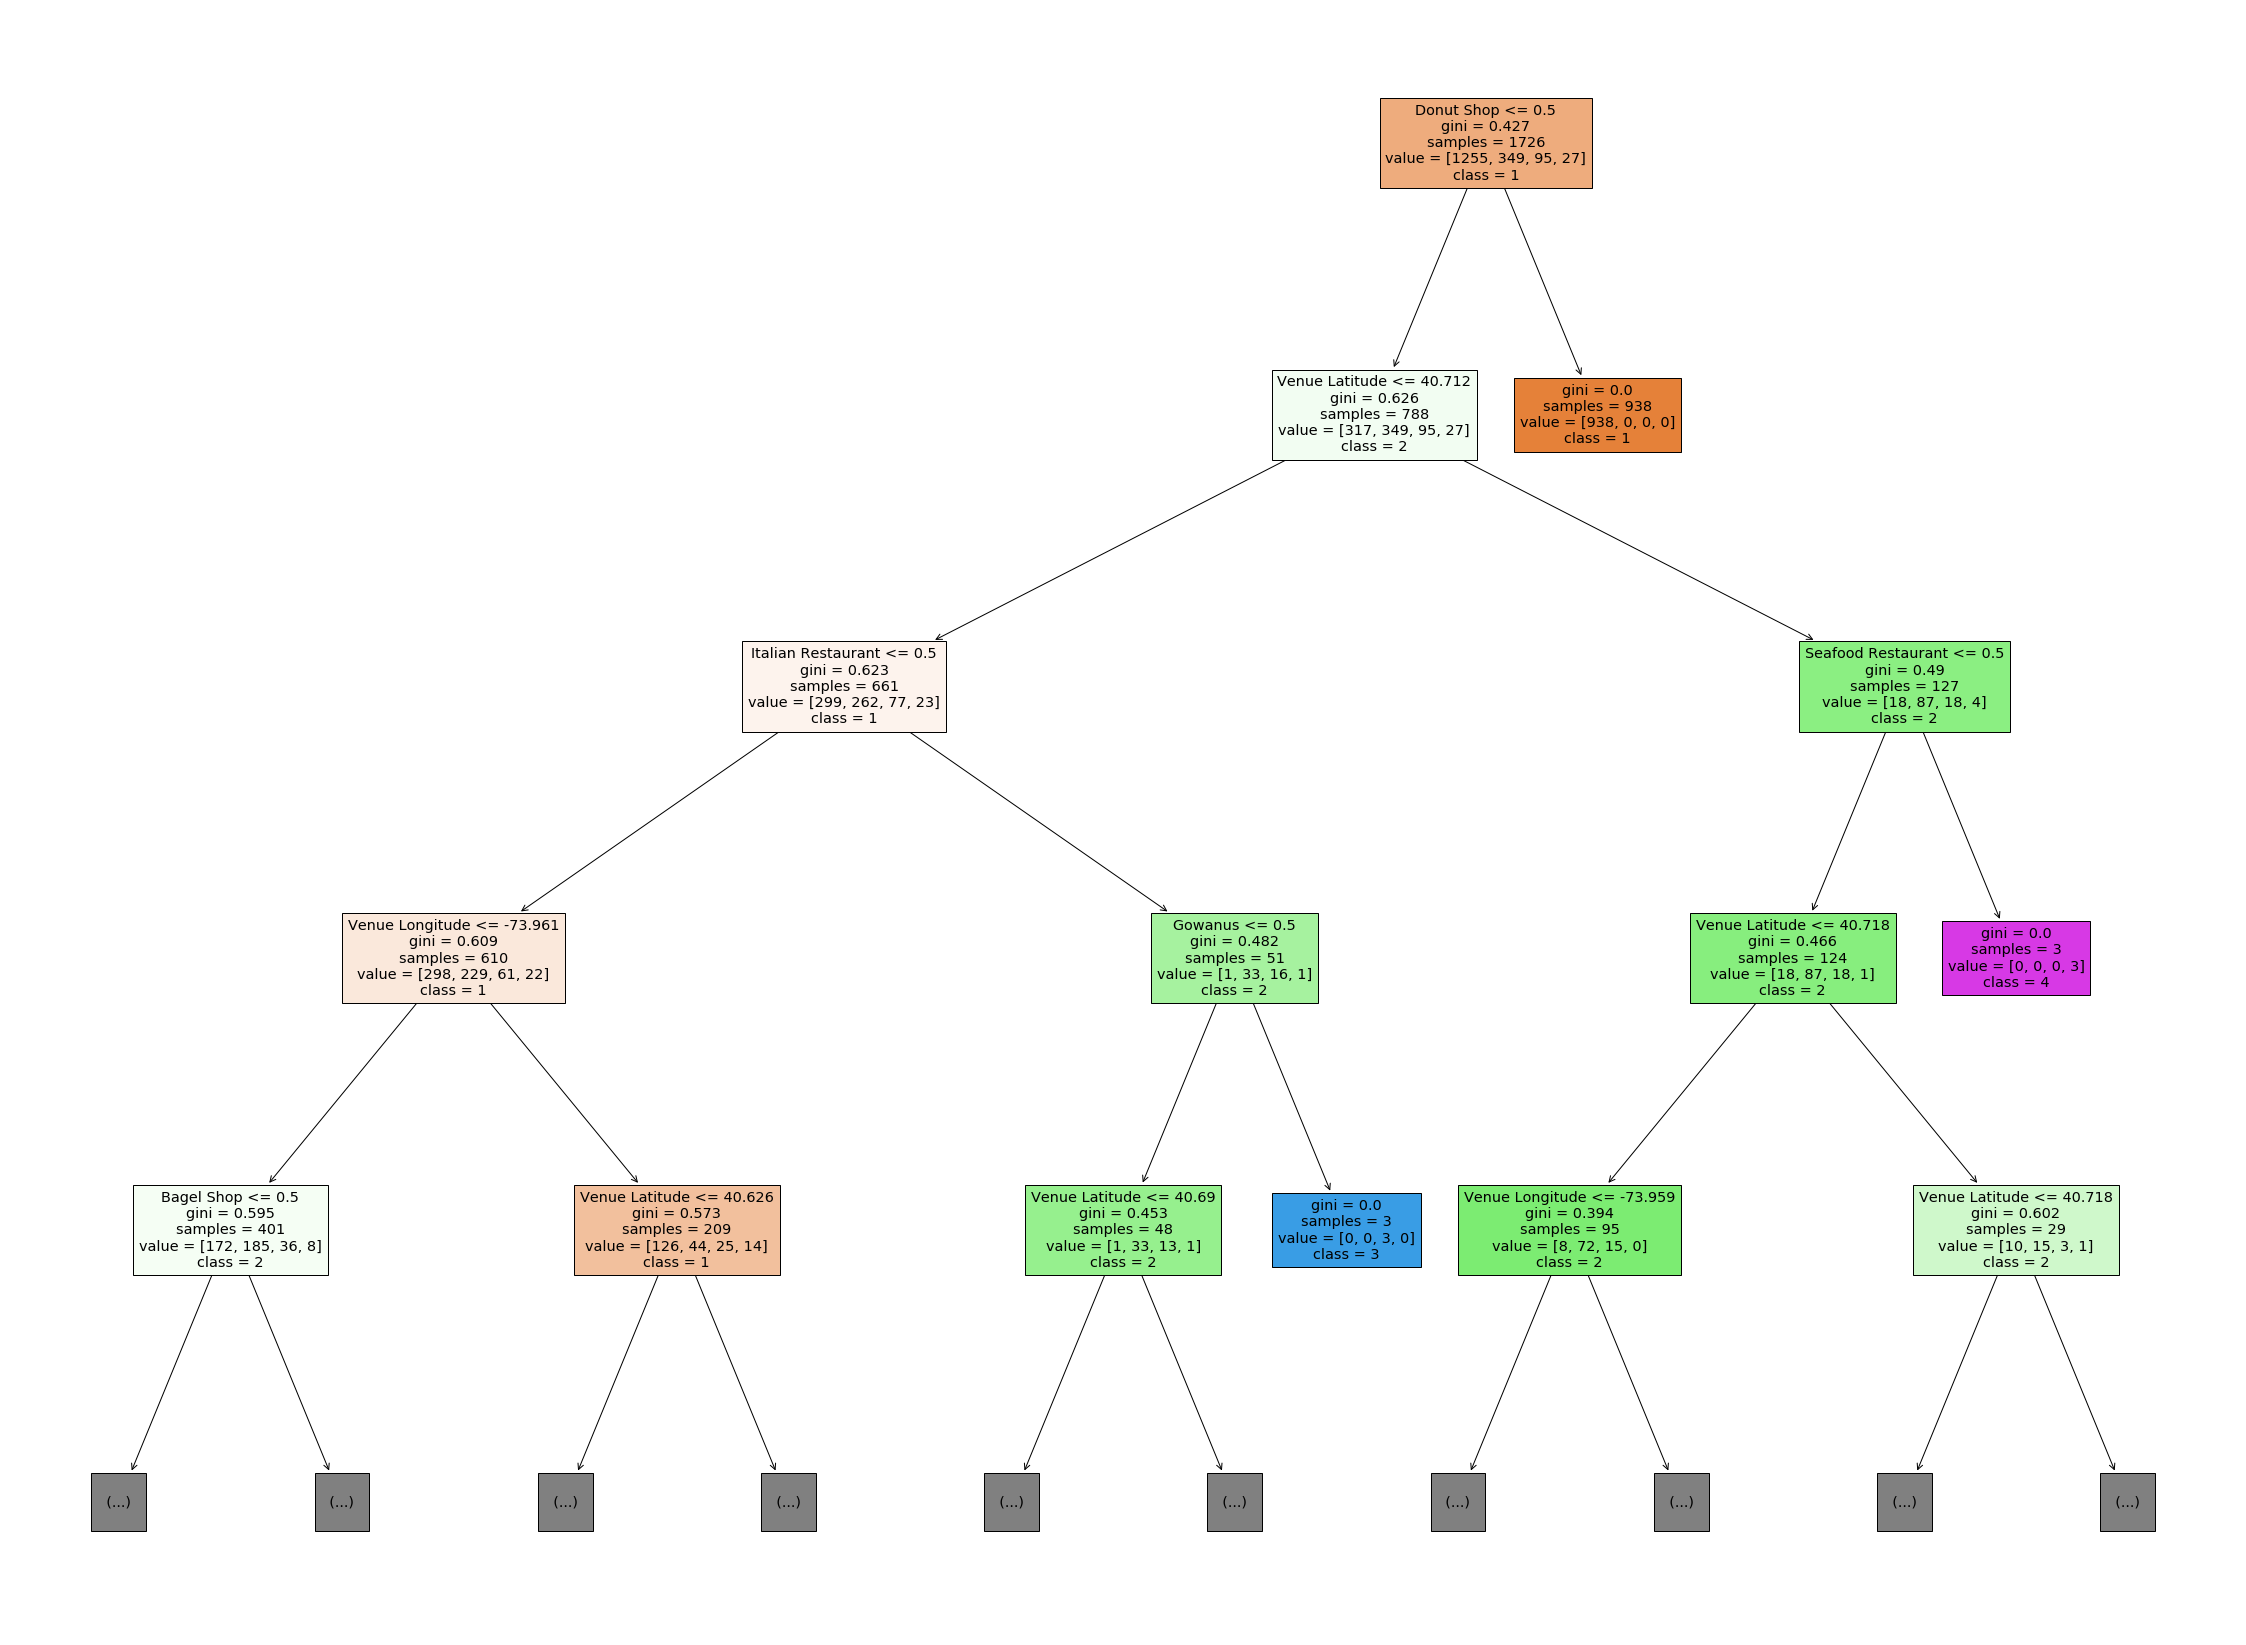

In [226]:
from sklearn import tree
from matplotlib import pyplot as plt
import graphviz 
plt.rcParams["figure.figsize"] = (40,30)
plt.show(tree.plot_tree(dt,max_depth=4,feature_names=X.columns,class_names=['1','2','3','4'],filled=True))

In [218]:
featureImportance=pd.DataFrame(data= np.transpose(FI), columns=X.columns)
featureImportance.sort_values(by=0,axis=1,ascending=False)

Donut Shop  Venue Latitude  Venue Longitude  Italian Restaurant  \
0    0.330584        0.192326         0.150344              0.0228   

   Bagel Shop  Japanese Restaurant  Tapas Restaurant  Pizza Place  \
0    0.016376             0.016232          0.014911     0.013619   

   New American Restaurant  Seafood Restaurant  Chinese Restaurant  \
0                 0.010947            0.010201            0.009551   

   Korean Restaurant  Dumpling Restaurant    Bakery  Steakhouse  Sunset Park  \
0           0.008758               0.0076  0.007472    0.006983     0.006679   

   Mexican Restaurant  American Restaurant  Spanish Restaurant  Burger Joint  \
0            0.006606             0.006454            0.006161      0.006116   

   Fast Food Restaurant  Sandwich Place  Bay Ridge  Deli / Bodega  \
0              0.006086        0.005861   0.005844        0.00582   

   Latin American Restaurant   Gowanus  Burrito Place  Breakfast Spot  \
0                   0.005638  0.005607       0.004815         0.00477   

   Borough Park  French Restaurant  Thai Restaurant  Vinegar Hill  \
0      0.004633           0.004627         0.004593      0.004565   

   Falafel Restaurant   Madison  Middle Eastern Restaurant  Food Truck  \
0            0.004483  0.004315                   0.003884    0.003767   

   Mediterranean Restaurant  Turkish Restaurant      Café     Diner  \
0                  0.003443            0.003361  0.003245  0.003066   

   Restaurant  Russian Restaurant  Ditmas Park  Vietnamese Restaurant  \
0    0.002937            0.002704     0.002364               0.002293   

   Taco Place  Bath Beach  BBQ Joint  African Restaurant  Cobble Hill  \
0    0.002286    0.002249   0.002241            0.002191      0.00217   

   Park Slope  Greek Restaurant  Vegetarian / Vegan Restaurant  \
0    0.002151          0.002143                       0.002142   

   Cuban Restaurant  Fort Greene  Fried Chicken Joint  Gravesend  Kensington  \
0          0.002095     0.002035             0.002035   0.001985    0.001903   

   Peruvian Restaurant  Homecrest  Asian Restaurant  Greenpoint  \
0             0.001719   0.001356          0.001356    0.001356   

   Sushi Restaurant  Broadway Junction  Caribbean Restaurant  Boerum Hill  \
0          0.001356           0.001356              0.001356     0.001356   

   Flatbush  Bedford Stuyvesant  Remsen Village  Crown Heights  \
0  0.001356            0.001244        0.001177       0.001102   

   Indian Restaurant  Bensonhurst  Clinton Hill  Fort Hamilton  Highland Park  \
0           0.001058     0.000761      0.000565       0.000452            0.0   

   Gerritsen Beach  Weeksville  Williamsburg  Georgetown  Fulton Ferry  \
0              0.0         0.0           0.0         0.0           0.0   

   Windsor Terrace  Mill Basin  Sheepshead Bay  Starrett City  South Side  \
0              0.0         0.0             0.0            0.0         0.0   

   New Lots  Rugby  Manhattan Terrace  Red Hook  Prospect Park South  \
0       0.0    0.0                0.0       0.0                  0.0   

   Prospect Lefferts Gardens  Prospect Heights  Midwood  Ocean Hill  \
0                        0.0               0.0      0.0         0.0   

   North Side  Flatlands  Tibetan Restaurant  Erasmus  East Williamsburg  \
0         0.0        0.0                 0.0      0.0                0.0   

   Ramen Restaurant  Polish Restaurant  Israeli Restaurant  Hot Dog Joint  \
0               0.0                0.0                 0.0            0.0   

   German Restaurant  Gastropub  Food Court  Food  Ethiopian Restaurant  \
0                0.0        0.0         0.0   0.0                   0.0   

   Eastern European Restaurant  Dim Sum Restaurant  Creperie  \
0                          0.0                 0.0       0.0   

   Cajun / Creole Restaurant  Argentinian Restaurant  Arepa Restaurant  \
0                        0.0                     0.0               0.0   

   Salad Place  Shanghai Restaurant  Sou